In [32]:
import pandas as pd
import seaborn as sb
from datetime import datetime
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load Data

## Eye states

In [37]:
eye_states = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking try/data/piloting first try/3d_eye_states.csv')

In [38]:
eye_states.head(2)

,section id,recording id,timestamp [ns],pupil diameter [mm],eyeball center left x [mm],eyeball center left y [mm],eyeball center left z [mm],eyeball center right x [mm],eyeball center right y [mm],eyeball center right z [mm],optical axis left x,optical axis left y,optical axis left z,optical axis right x,optical axis right y,optical axis right z
0,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,31.820908,11.971153,-39.190109,0.144663,0.46831,0.871642,-0.034506,0.473891,0.879907
1,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,31.755999,11.989693,-39.134827,0.147503,0.46787,0.871402,-0.035947,0.474145,0.879713


In [39]:
eye_states.shape

(103886, 16)

In [40]:
eye_states.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'pupil diameter [mm]',
       'eyeball center left x [mm]', 'eyeball center left y [mm]',
       'eyeball center left z [mm]', 'eyeball center right x [mm]',
       'eyeball center right y [mm]', 'eyeball center right z [mm]',
       'optical axis left x', 'optical axis left y', 'optical axis left z',
       'optical axis right x', 'optical axis right y', 'optical axis right z'],
      dtype='object')

In [41]:
column_names_states = {'section id': 'section_id',
                       'recording id': 'recording_id',
                       'timestamp [ns]': 'timestamp',
                       'pupil diameter [mm]': 'pupil_diameter',
                       'eyeball center left x [mm]': 'eyeball_center_lx',
                       'eyeball center left y [mm]': 'eyeball_center_ly',
                       'eyeball center left z [mm]': 'eyeball_center_lz',
                       'eyeball center right x [mm]': 'eyeball_center_rx',
                       'eyeball center right y [mm]': 'eyeball_center_ry',
                       'eyeball center right z [mm]': 'eyeball_center_rz',
                       'optical axis left x': 'optical_axis_lx',
                       'optical axis left y': 'optical_axis_ly',
                       'optical axis left z': 'optical_axis_lz',
                       'optical axis right x': 'optical_axis_rx',
                       'optical axis right y': 'optical_axis_ry',
                       'optical axis right z': 'optical_axis_rz'}

eye_states = eye_states.rename(columns=column_names_states)

In [42]:
eye_states.head(2)

,section_id,recording_id,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,eyeball_center_rx,eyeball_center_ry,eyeball_center_rz,optical_axis_lx,optical_axis_ly,optical_axis_lz,optical_axis_rx,optical_axis_ry,optical_axis_rz
0,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,31.820908,11.971153,-39.190109,0.144663,0.46831,0.871642,-0.034506,0.473891,0.879907
1,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,31.755999,11.989693,-39.134827,0.147503,0.46787,0.871402,-0.035947,0.474145,0.879713


In [43]:
eye_states_short = eye_states[['timestamp', 'pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly', 'eyeball_center_lz', 'optical_axis_lx', 'optical_axis_ly', 'optical_axis_lz']]

In [44]:
eye_states_short.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz
0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.46831,0.871642
1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.46787,0.871402


## Gaze

In [45]:
gaze = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking try/data/piloting first try/gaze.csv')

In [46]:
gaze.head(2)

,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,azimuth [deg],elevation [deg]
0,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525860716129,880.009,986.375,1.0,NaN,NaN,5.005893,-24.366639
1,6ce02d80-b03c-41d9-8d63-64645c7b2c0b,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240525865716129,875.569,996.474,1.0,NaN,NaN,4.715383,-25.020426


In [47]:
column_names_gaze = {'section id' : 'section_id',
                     'recording id' : 'recording_id',
                     'timestamp [ns]' : 'timestamp',
                     'gaze x [px]' : 'gaze_x',
                     'gaze y [px]' : 'gaze_y',
                     'fixation id' : 'fixation_id',
                     'blink id' : 'blink_id',
                     'azimuth [deg]' : 'azimuth',
                     'elevation [deg]' : 'elevation'}

gaze = gaze.rename(columns=column_names_gaze)

In [48]:
gaze_short = gaze[['timestamp', 'gaze_x', 'gaze_y', 'azimuth', 'elevation']]

## Events

In [49]:
events = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking try/data/piloting first try/events.csv')

In [50]:
events.head(2)

,recording id,timestamp [ns],name,type
0,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240520721000000,recording.begin,recording
1,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554055752000,right_screen.start,cloud


In [51]:
events.columns

Index(['recording id', 'timestamp [ns]', 'name', 'type'], dtype='object')

In [52]:
events = events.rename(columns={'recording id' : 'recording_id', 'timestamp [ns]' : 'timestamp'})

In [53]:
events.head(2)

,recording_id,timestamp,name,type
0,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240520721000000,recording.begin,recording
1,003aaa32-9a1c-46ce-84c8-ddcc011733e3,1707240554055752000,right_screen.start,cloud


In [54]:
events_short = events[['timestamp', 'name']]

# Merge datasets

In [55]:
eye_states_gaze = eye_states_short.merge(gaze_short, on='timestamp')

In [56]:
eye_states_gaze.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation
0,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.46831,0.871642,880.009,986.375,5.005893,-24.366639
1,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.46787,0.871402,875.569,996.474,4.715383,-25.020426


In [57]:
eye_states_gaze.shape

(103886, 12)

In [58]:
eye_states_gaze_events = eye_states_gaze.merge(events_short, how='outer', on='timestamp')

In [59]:
eye_states_gaze_events.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name
0,1707240520721000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recording.begin
1,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.46831,0.871642,880.009,986.375,5.005893,-24.366639,NaN


# Timestamps to date

In [60]:
eye_states_gaze_events['timestamp_data'] = [datetime.fromtimestamp(ts // 1000000000) for ts in eye_states_gaze_events['timestamp']]

In [61]:
eye_states_gaze_events

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1707240520721000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recording.begin,2024-02-06 12:28:40
1,1707240525860716129,6.101728,-31.029068,15.071472,-39.422306,0.144663,0.468310,0.871642,880.009,986.375,5.005893,-24.366639,NaN,2024-02-06 12:28:45
2,1707240525865716129,6.073446,-31.089268,15.178902,-39.486629,0.147503,0.467870,0.871402,875.569,996.474,4.715383,-25.020426,NaN,2024-02-06 12:28:45
3,1707240525880716129,6.038457,-31.224716,15.223293,-39.728813,0.128238,0.496139,0.858721,866.565,1027.974,4.139349,-27.054938,NaN,2024-02-06 12:28:45
4,1707240525885716129,6.053344,-31.080765,15.304230,-39.670540,0.125351,0.499520,0.857186,861.566,1029.880,3.791460,-27.181279,NaN,2024-02-06 12:28:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103919,1707241060011397129,6.001334,-30.980228,14.236740,-39.625092,0.084920,0.407005,0.909470,816.558,908.598,0.600762,-19.378063,NaN,2024-02-06 12:37:40
103920,1707241060016397129,6.009223,-31.004936,14.230232,-39.661438,0.084683,0.404915,0.910425,814.048,910.749,0.431305,-19.517137,NaN,2024-02-06 12:37:40
103921,1707241060021397129,6.003671,-30.999676,14.164185,-39.623611,0.084236,0.410721,0.907862,817.503,911.561,0.665301,-19.569471,NaN,2024-02-06 12:37:40
103922,1707241060026397129,5.825497,-31.715012,15.375488,-40.032200,0.024528,-0.132906,0.990825,758.063,423.015,-3.287020,12.236596,NaN,2024-02-06 12:37:40


# Separate flight simulator parts

## Navigation parameters

In [70]:
filtered_nav_par_indexes = eye_states_gaze_events[(eye_states_gaze_events['name'] == 'navigation_parameters.starts') |
                                       (eye_states_gaze_events['name'] == 'navigation_parameters.end')].index

In [71]:
filtered_nav_par_indexes

Index([5002, 5132, 5477, 5549, 12589, 13126, 13503, 14703, 16358, 16473, 17142,
       20090],
      dtype='int64')

In [72]:
filtered_nav_par = pd.DataFrame()
for i in range(0, len(filtered_nav_par_indexes), 2):
    filtered_nav_par = pd.concat([filtered_nav_par, eye_states_gaze_events.loc[filtered_nav_par_indexes[i]:filtered_nav_par_indexes[i+1]]])

In [74]:
filtered_nav_par.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
5002,1707240561312019000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.starts,2024-02-06 12:29:21
5003,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,NaN,2024-02-06 12:29:21


In [75]:
filtered_nav_par['name'] = filtered_nav_par['name'].apply(lambda x: 'navigation parameters' if pd.isna(x) else x)

In [76]:
filtered_nav_par.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
5002,1707240561312019000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,navigation_parameters.starts,2024-02-06 12:29:21
5003,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,navigation parameters,2024-02-06 12:29:21


In [77]:
navigation_parameters = filtered_nav_par.dropna().reset_index(drop=True)

In [78]:
navigation_parameters.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,navigation parameters,2024-02-06 12:29:21
1,1707240561318651129,4.461890,-31.740986,14.920807,-40.577309,-0.146993,0.199509,0.968808,604.379,721.965,-13.307777,-7.178110,navigation parameters,2024-02-06 12:29:21


In [79]:
navigation_parameters.shape

(4996, 14)

## Main screen

In [80]:
filtered_main_indexes = eye_states_gaze_events[(eye_states_gaze_events['name'] == 'main_screen.start') |
                                       (eye_states_gaze_events['name'] == 'main_screen.end')].index

In [81]:
filtered_main_indexes

Index([4361, 4491, 4813, 4968, 5277, 5421, 5621, 5646, 10519, 10567, 15005,
       15024],
      dtype='int64')

In [82]:
filtered_main = pd.DataFrame()
for i in range(0, len(filtered_main_indexes), 2):
    filtered_main = pd.concat([filtered_main, eye_states_gaze_events.loc[filtered_main_indexes[i]:filtered_main_indexes[i+1]]])

In [83]:
filtered_main.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
4361,1707240557466509000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,main_screen.start,2024-02-06 12:29:17
4362,1707240557470132129,6.087544,-31.950706,15.86528,-39.885796,0.098015,-0.086471,0.991421,817.824,449.325,0.665227,10.5345,NaN,2024-02-06 12:29:17


In [84]:
filtered_main['name'] = filtered_main['name'].apply(lambda x: 'main screen' if pd.isna(x) else x)

In [85]:
filtered_main.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
4361,1707240557466509000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,main_screen.start,2024-02-06 12:29:17
4362,1707240557470132129,6.087544,-31.950706,15.86528,-39.885796,0.098015,-0.086471,0.991421,817.824,449.325,0.665227,10.5345,main screen,2024-02-06 12:29:17


In [86]:
main_screen = filtered_main.dropna().reset_index(drop=True)

In [87]:
main_screen.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1707240557470132129,6.087544,-31.950706,15.865280,-39.885796,0.098015,-0.086471,0.991421,817.824,449.325,0.665227,10.534500,main screen,2024-02-06 12:29:17
1,1707240557475132129,6.081301,-31.709511,15.842545,-39.810513,0.093039,-0.089415,0.991639,821.094,447.444,0.881143,10.656784,main screen,2024-02-06 12:29:17


In [88]:
main_screen.shape

(515, 14)

## Right screen

In [89]:
filtered_right_indexes = eye_states_gaze_events[(eye_states_gaze_events['name'] == 'right_screen.start') |
                                       (eye_states_gaze_events['name'] == 'right_screen.end')].index

In [90]:
filtered_right_indexes

Index([3802, 3913, 10954, 11095], dtype='int64')

In [91]:
filtered_right = pd.DataFrame()
for i in range(0, len(filtered_right_indexes), 2):
    filtered_right  = pd.concat([filtered_right, eye_states_gaze_events.loc[filtered_right_indexes[i]:filtered_right_indexes[i+1]]])

In [92]:
filtered_right.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3802,1707240554055752000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_screen.start,2024-02-06 12:29:14
3803,1707240554056864129,6.020391,-31.397358,15.432617,-38.729904,0.251825,0.03638,0.967089,970.994,570.496,10.656527,2.613362,NaN,2024-02-06 12:29:14


In [93]:
filtered_right['name'] = filtered_right['name'].apply(lambda x: 'right screen' if pd.isna(x) else x)

In [94]:
filtered_right.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3802,1707240554055752000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_screen.start,2024-02-06 12:29:14
3803,1707240554056864129,6.020391,-31.397358,15.432617,-38.729904,0.251825,0.03638,0.967089,970.994,570.496,10.656527,2.613362,right screen,2024-02-06 12:29:14


In [95]:
right_screen = filtered_right.dropna().reset_index(drop=True)

In [96]:
right_screen.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1707240554056864129,6.020391,-31.397358,15.432617,-38.729904,0.251825,0.036380,0.967089,970.994,570.496,10.656527,2.613362,right screen,2024-02-06 12:29:14
1,1707240554061864129,6.057449,-31.442722,15.366661,-38.730469,0.257955,0.041898,0.965248,973.262,574.044,10.803142,2.382732,right screen,2024-02-06 12:29:14


In [97]:
right_screen.shape

(250, 14)

## Other buttons

In [98]:
filtered_buttons_indexes = eye_states_gaze_events[(eye_states_gaze_events['name'] == 'other_buttons.start') |
                                       (eye_states_gaze_events['name'] == 'other_buttons.end')].index

In [99]:
filtered_buttons_indexes

Index([3950, 4333, 4504, 4774, 5146, 5258, 6134, 9239], dtype='int64')

In [100]:
filtered_buttons = pd.DataFrame()
for i in range(0, len(filtered_buttons_indexes), 2):
    filtered_buttons = pd.concat([filtered_buttons, eye_states_gaze_events.loc[filtered_buttons_indexes[i]:filtered_buttons_indexes[i+1]]])

In [102]:
filtered_buttons.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3950,1707240554889807000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other_buttons.start,2024-02-06 12:29:14
3951,1707240554892744129,5.120378,-31.891327,14.763153,-39.358105,0.082142,0.36802,0.926182,778.918,869.787,-1.929059,-16.863153,NaN,2024-02-06 12:29:14


In [103]:
filtered_buttons['name'] = filtered_buttons['name'].apply(lambda x: 'other buttons' if pd.isna(x) else x)

In [104]:
filtered_buttons.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
3950,1707240554889807000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other_buttons.start,2024-02-06 12:29:14
3951,1707240554892744129,5.120378,-31.891327,14.763153,-39.358105,0.082142,0.36802,0.926182,778.918,869.787,-1.929059,-16.863153,other buttons,2024-02-06 12:29:14


In [105]:
other_buttons = filtered_buttons.dropna().reset_index(drop=True)

In [106]:
other_buttons.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1707240554892744129,5.120378,-31.891327,14.763153,-39.358105,0.082142,0.368020,0.926182,778.918,869.787,-1.929059,-16.863153,other buttons,2024-02-06 12:29:14
1,1707240554897629129,5.122826,-31.889763,14.767155,-39.371407,0.081313,0.368007,0.926261,779.021,868.544,-1.921718,-16.782706,other buttons,2024-02-06 12:29:14


In [107]:
other_buttons.shape

(3866, 14)

# Select data for ML

In [108]:
labeled_data = pd.concat([navigation_parameters, main_screen, right_screen, other_buttons], axis=0)

In [109]:
labeled_data.shape

(9627, 14)

In [110]:
labeled_data.head(2)

,timestamp,pupil_diameter,eyeball_center_lx,eyeball_center_ly,eyeball_center_lz,optical_axis_lx,optical_axis_ly,optical_axis_lz,gaze_x,gaze_y,azimuth,elevation,name,timestamp_data
0,1707240561313651129,4.480158,-31.848492,15.027313,-40.767693,-0.131422,0.188677,0.973206,620.994,724.002,-12.227112,-7.322114,navigation parameters,2024-02-06 12:29:21
1,1707240561318651129,4.461890,-31.740986,14.920807,-40.577309,-0.146993,0.199509,0.968808,604.379,721.965,-13.307777,-7.178110,navigation parameters,2024-02-06 12:29:21


In [111]:
labeled_data.columns

Index(['timestamp', 'pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly',
       'eyeball_center_lz', 'optical_axis_lx', 'optical_axis_ly',
       'optical_axis_lz', 'gaze_x', 'gaze_y', 'azimuth', 'elevation', 'name',
       'timestamp_data'],
      dtype='object')

In [114]:
X_to_corr = labeled_data[['pupil_diameter', 'eyeball_center_lx', 'eyeball_center_ly', 'eyeball_center_lz', 'azimuth',  'elevation']]

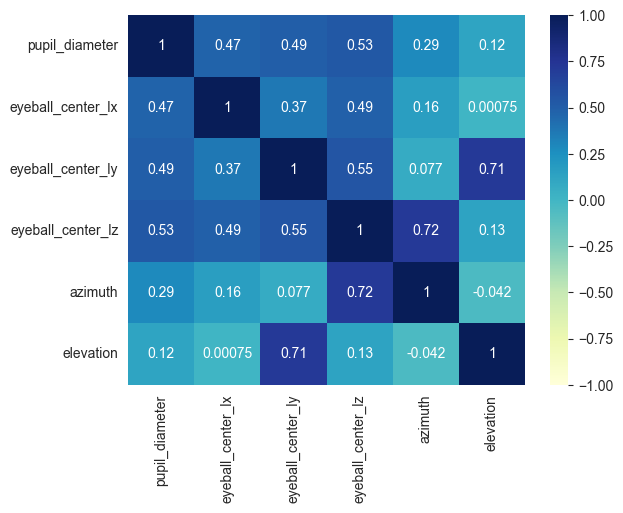

In [115]:
dataplot = sb.heatmap(X_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [118]:
X = X_to_corr.values

In [119]:
X

array([[  4.48015785, -31.84849167,  15.02731323, -40.76769257,
        -12.22711175,  -7.32211426],
       [  4.46189022, -31.74098587,  14.92080688, -40.57730865,
        -13.30777659,  -7.17811047],
       [  4.472579  , -31.88853455,  14.87945938, -40.6368866 ,
        -13.10721868,  -7.24131869],
       ...,
       [  6.2565136 , -31.27894592,  15.84399796, -38.51879883,
          9.84390538,  -1.07743903],
       [  6.27273893, -31.31751251,  15.89839935, -38.57975388,
          9.72961912,  -0.98293251],
       [  6.28641796, -31.3586998 ,  15.82260895, -38.57206726,
          9.60025919,  -0.83208713]])

In [121]:
y = labeled_data['name'].values

In [122]:
y

array(['navigation parameters', 'navigation parameters',
       'navigation parameters', ..., 'other buttons', 'other buttons',
       'other buttons'], dtype=object)

# Preprocessing

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
sc = StandardScaler()

In [125]:
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [126]:
X_train

array([[ 0.31143747,  0.28351641,  0.9557086 ,  0.33430509, -0.33957395,
         0.74745278],
       [-0.12423383, -1.91338631, -0.70794984, -0.05321743, -0.13863332,
        -1.02354078],
       [-1.42922811, -1.49690879,  0.27556501, -0.58013363, -0.39515476,
         1.1453059 ],
       ...,
       [-0.14651871,  1.96576168,  0.42357425,  0.8913435 , -0.25474965,
        -1.53627404],
       [-0.70132285, -1.13955855, -0.80492502, -0.1829203 ,  0.27111801,
        -1.24693214],
       [-0.70308079, -0.08454591, -0.19051003,  1.1533301 ,  1.20108822,
        -0.58872576]])

## K-nearest neighbors classifier

In [127]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [128]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['navigation parameters' 'main screen']
 ['navigation parameters' 'navigation parameters']
 ['other buttons' 'other buttons']
 ...
 ['other buttons' 'other buttons']
 ['navigation parameters' 'navigation parameters']
 ['other buttons' 'other buttons']]


In [129]:
confusion_matrix(y_test, y_pred)

array([[101,   4,   1,   0],
       [  2, 948,   2,   0],
       [  1,   0, 815,   2],
       [  1,   5,   0,  44]])

In [130]:
accuracy_score(y_test, y_pred)

0.9906542056074766